# Widzenie komputerowe - Laboratoria nr 11

## Opis laboratoriów

Wprowadzenie do biblioteki TensorFlow oraz neuronowych modeli wizyjnych.

## Funkcje pomocnicze

### Niezbędne biblioteki


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import PIL

from pprint import pprint

### Zbiory danych

- MNIST - popularny zbiór danych przedstawiający obrazki o rozmiarze 28x28 zawierające odręczne pismo w postaci cyfr. Więcej informacji pod [linkiem](http://yann.lecun.com/exdb/mnist/).

### Wizualizacja



Skrypt do wyżwietlania obrazów BGR oraz Grayscale.

In [2]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

# TensorFlow

TensorFlow to jedna z wiodących bibliotek do uczenia maszynowego raz przetwarzania big data. Biblioteka wspierana i rozwijana jest przez zespół Google Brain.

Architektura TensorFlow jest bardzo podobna do popularnej biblioteki NumPy, do tego stopnia, że niektóre podstawowe operacje działają analogicznie w obu z nich.

Najczęstszym zastosowaniem TensorFlow są prace z sieciami neuronowymi zarówno w postaci badawczej jak i komercyjnej. Oprócz podstawowych operacji metematycznych potrzebnych do przetwarzania sieci neuronowych biblioteka TensorFlow zawiera szereg funkcjonalności pozwalających na wykorzystanie systemów opartych na TensorFlow w środowiskach produkcyjnych na różnych platformach - od urządzeń webowych przez wewnętrzne zastosowania klastrowe po urządzenia mobilne.

## Wstęp do TensorFlow 2.0

Wiele operacji w TensorFlow i NumPy wygląda bardzo podobnie, zaczynając od alokacji danych:

In [3]:
np_arr = np.zeros([5, 5])
tf_arr = tf.zeros([5, 5])

np_arr = np.ones([5, 5])
tf_arr = tf.ones([5, 5])

np_arr = np.array([1, 2, 3, 4, 5])
tf_arr = tf.constant([1, 2, 3, 4, 5])

np_arr = np.random.normal(0, 1, [5, 5])
tf_arr = tf.random.normal([5, 5], 0, 1)

print('NumPy array:\n', np_arr, '\n')
print('Tensorflow array:\n', tf_arr, '\n')

NumPy array:
 [[ 1.83257344 -1.70358252 -1.19424449  0.21385333  0.29955904]
 [-0.31709054 -1.65094666 -0.11534278  1.95228623  0.21077164]
 [ 0.03154216 -1.7671787   0.83347173  1.28494197  0.40281671]
 [ 0.87430994 -1.96609837 -1.08892906  0.06231425 -1.42325882]
 [ 1.86159029  0.46164797  1.03601147  2.16197793  0.06223517]] 

Tensorflow array:
 tf.Tensor(
[[-0.02390992  1.7142501  -1.4630088   0.2784384   0.9156381 ]
 [ 0.62760437 -0.9811709  -0.5727828   0.13520549 -1.5953867 ]
 [ 0.66936976  1.1630323   0.42523926  0.37416306 -0.7343716 ]
 [ 0.23985566  0.27071923 -0.05507223  0.01051528  1.783367  ]
 [-0.70189977  1.4547762   0.17748678 -0.26194933 -0.28426996]], shape=(5, 5), dtype=float32) 



przez operacje na danych:

In [4]:
np_a = np.ones([5, 5])
tf_a = tf.ones([5, 5])

np_a = np_a + np_a
np_a = np_a * np_a
np_a = np_a ** 2 + np_a ** 3

tf_a = tf_a + tf_a
tf_a = tf_a * tf_a
tf_a = tf_a ** 2 + tf_a ** 3

print('NumPy array:\n', np.sqrt(np_a), '\n')
print('Tensorflow array:\n', tf.sqrt(tf_a), '\n')

NumPy array:
 [[8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]] 

Tensorflow array:
 tf.Tensor(
[[8.944272 8.944272 8.944272 8.944272 8.944272]
 [8.944272 8.944272 8.944272 8.944272 8.944272]
 [8.944272 8.944272 8.944272 8.944272 8.944272]
 [8.944272 8.944272 8.944272 8.944272 8.944272]
 [8.944272 8.944272 8.944272 8.944272 8.944272]], shape=(5, 5), dtype=float32) 



TensorFlow zawiera implementacje funkcji redukcji wymiarowości, m.in. suma, średnia, minimum, maximum.

In [5]:
print('TensorFlow sum:', tf.reduce_sum(tf_a))
print('TensorFlow mean:', tf.reduce_mean(tf_a))
print('TensorFlow min:', tf.reduce_min(tf_a))
print('TensorFlow max:', tf.reduce_max(tf_a))

print('TensorFlow sum:', np_a.sum())
print('TensorFlow mean:', np_a.mean())
print('TensorFlow min:', np_a.min())
print('TensorFlow max:', np_a.max())

TensorFlow sum: tf.Tensor(2000.0, shape=(), dtype=float32)
TensorFlow mean: tf.Tensor(80.0, shape=(), dtype=float32)
TensorFlow min: tf.Tensor(80.0, shape=(), dtype=float32)
TensorFlow max: tf.Tensor(80.0, shape=(), dtype=float32)
TensorFlow sum: 2000.0
TensorFlow mean: 80.0
TensorFlow min: 80.0
TensorFlow max: 80.0


Analogicznie do NumPy, redukcję można wykonać względem ustalonych wymiarów:

In [6]:
print('TensorFlow sum:', tf.reduce_sum(tf_a, 0))
print('TensorFlow mean:', tf.reduce_mean(tf_a, 1))
print('TensorFlow min:', tf.reduce_min(tf_a, 0))
print('TensorFlow max:', tf.reduce_max(tf_a, 1))

print('TensorFlow sum:', np_a.sum(0))
print('TensorFlow mean:', np_a.mean(1))
print('TensorFlow min:', np_a.min(0))
print('TensorFlow max:', np_a.max(1))

TensorFlow sum: tf.Tensor([400. 400. 400. 400. 400.], shape=(5,), dtype=float32)
TensorFlow mean: tf.Tensor([80. 80. 80. 80. 80.], shape=(5,), dtype=float32)
TensorFlow min: tf.Tensor([80. 80. 80. 80. 80.], shape=(5,), dtype=float32)
TensorFlow max: tf.Tensor([80. 80. 80. 80. 80.], shape=(5,), dtype=float32)
TensorFlow sum: [400. 400. 400. 400. 400.]
TensorFlow mean: [80. 80. 80. 80. 80.]
TensorFlow min: [80. 80. 80. 80. 80.]
TensorFlow max: [80. 80. 80. 80. 80.]


### Zmienne

Ważnym elementem biblioteki TensorFlow są **zmienne**, czyli obiekty, które przechowują pewną wartość i mogą być uaktualniane. Pozostałe wyniki operacji w TensorFlow to **Tensory**.

In [7]:
# inicjalizacja zmiennej z losowymi wartościami
b = tf.Variable(tf.random.uniform([5]))

print(b.numpy())

# wykonanie operacji dodawania na zmiennej
b.assign_add([1, 0, 0, 1, 0])

print(b.numpy())

# wykonanie operacji odejmowania na zmiennej
b.assign_sub([1, 0, 0, 1, 0])

print(b.numpy())

# wykonanie operacji przypisania na zmiennej
b.assign([1, 2, 3, 4, 5])

print(b.numpy())

[0.5036434 0.6469215 0.6194267 0.8410704 0.0745703]
[1.5036434 0.6469215 0.6194267 1.8410704 0.0745703]
[0.5036434 0.6469215 0.6194267 0.8410704 0.0745703]
[1. 2. 3. 4. 5.]


Istnienie zmiennych w TensorFlow jest bardzo ważne ze względu na automatyczne uaktualnianie zmiannych w kontekście uczenia sieci neuronowych.

## Podstawowe operacje neuronowe

Jedną z podstawowych operacji neuronowych jest warstwa **w pełni połączona**, czyli warstwa składająca się z **neuronów**. Każdy neuron wykonuje operację **kombinacji liniowej** z następującą **funkcją aktywacji**:

$$z_j = \sum x_i * w_{ij} + b_j$$
$$y_j = f(z_j)$$

lub innymi słowy, neuron pobiera wektor danych wejściowych, przemnaża go przez wektor **zmiennych uczonych**, sumuje, dodaje wyraz wolny (funkcja liniowa) oraz aplikuje pewną funkcję aktywacji.


In [8]:
w = tf.Variable(tf.random.uniform([10, 5], dtype=tf.float32))
b = tf.Variable(tf.random.uniform([5], dtype=tf.float32))

print(f'w: {w}\nb: {b}')

w: <tf.Variable 'Variable:0' shape=(10, 5) dtype=float32, numpy=
array([[0.9615675 , 0.07248032, 0.93729174, 0.09889793, 0.36765695],
       [0.6029054 , 0.4771347 , 0.7471566 , 0.9015112 , 0.81431127],
       [0.16819489, 0.04842067, 0.3128711 , 0.10318923, 0.8617321 ],
       [0.72092307, 0.16987908, 0.43566084, 0.13633406, 0.6897756 ],
       [0.58888626, 0.80742323, 0.9070953 , 0.45287085, 0.12577868],
       [0.6313671 , 0.52571654, 0.05327344, 0.18125343, 0.8393214 ],
       [0.45720446, 0.24305928, 0.7063868 , 0.085132  , 0.35874403],
       [0.5271816 , 0.25629616, 0.06294894, 0.552578  , 0.94414246],
       [0.0217061 , 0.18760645, 0.9317018 , 0.07265723, 0.12096715],
       [0.32452428, 0.69310236, 0.73828304, 0.6247289 , 0.4651935 ]],
      dtype=float32)>
b: <tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=
array([0.13336301, 0.617605  , 0.34903884, 0.4237982 , 0.41536748],
      dtype=float32)>


In [9]:
def neuron(x, f=tf.identity):
  return f(x @ w + b)

In [10]:
x = tf.random.normal([1, 10])
y = neuron(x)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(1, 10): [[-0.67101866  1.6775793   2.1856256  -0.40617266 -1.2570071  -0.25623453
   0.82447004 -0.6113902  -0.4807323  -0.01019818]]
y(1, 5): [[-0.28677228  0.20302758  0.414983    1.1152931   2.4204597 ]]


Jak widać na powyższym przykładzie operację kombinacji liniowej dla wielu wektorów (tzn. przetwarzanie można zoptymalizować wykonując operacje neuronu na wielu przykładach na raz) można zrealizować jako mnożenie macierzy.

In [11]:
x = tf.random.normal([5, 10])
y = neuron(x)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[-0.00942136  0.51492167  0.14211647  0.26166892 -1.7389237   0.7452151
   0.7997611   1.3509794   1.029847   -0.861303  ]
 [-1.8457037  -1.4852324  -0.5728773   0.4605293  -1.1429447   0.03936009
   2.5412645  -1.3509401   0.4385016  -0.6087838 ]
 [-1.7731847   0.05703396  0.13129383  0.6556252   0.2794445   0.13898113
  -0.01125485  1.0163432  -0.5212233  -0.1778185 ]
 [-0.3013292  -0.8858095  -0.92689574 -1.267235   -0.9319315  -0.9213843
   0.52181286  0.90174115 -0.6299863  -0.4355193 ]
 [-0.03139424 -0.40508288 -1.1239228  -0.51269305  1.8914359  -0.63436204
   1.1443144   0.19619995 -0.73065704  0.6904039 ]]
y(5, 5): [[ 0.91448134  0.03854215  0.31933746  0.6363301   2.8272567 ]
 [-2.687783   -1.1447273  -1.8347168  -2.4831142  -2.3533611 ]
 [-0.32860863  0.96944386 -1.2436217   0.96621764  1.3368237 ]
 [-2.3315108  -1.3859982  -2.814883   -1.0371807  -2.2203798 ]
 [ 0.84843534  2.1440942   1.7735059   1.1952895  -0.7141906 ]]


Powyższa implementacja neuronu wykorzystuje funkcję aktywacji **identity**, czyli brak modyfikacji, a więc jest to funkcja liniowa. Do innych funkcji aktywacji można zaliczyć:
- relu - jedna z ważniejszych operacji ze względu na jej prostą pochodną.,
- sigmoid - jedna z pierwszych aplikowanych funkcji aktywacji w neuronach,
- tangens hiperboliczny - najczęściej wykorzystywana w sieciach rekurencyjnych,
- elu, selu, relu6, itp. - różne modyfikacje funkcji relu.


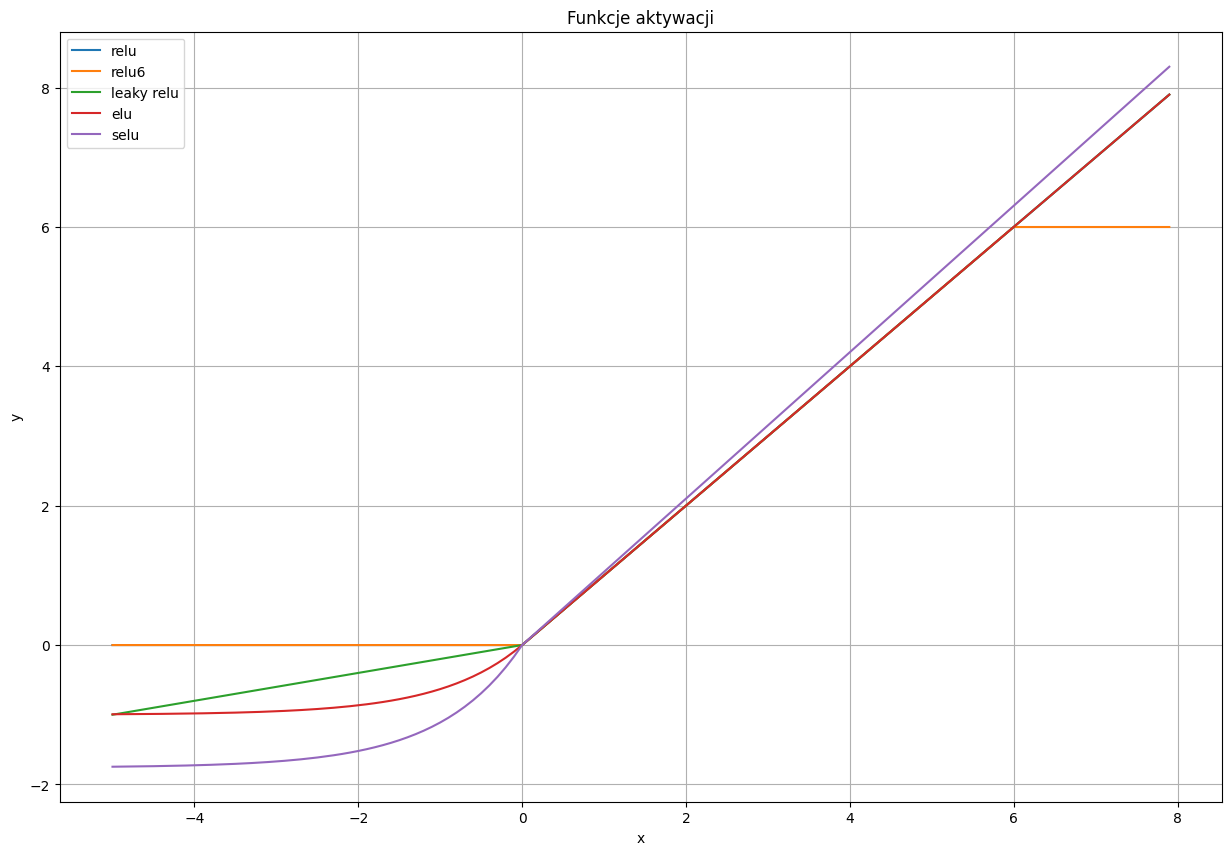

In [12]:
x = tf.range(-5, 8, 0.1, tf.float32)

plt.figure(figsize=(15, 10))
plt.title('Funkcje aktywacji')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, tf.nn.relu(x), label='relu')
plt.plot(x, tf.nn.relu6(x), label='relu6')
plt.plot(x, tf.nn.leaky_relu(x), label='leaky relu')
plt.plot(x, tf.nn.elu(x), label='elu')
plt.plot(x, tf.nn.selu(x), label='selu')
plt.grid()
plt.legend()
plt.show()

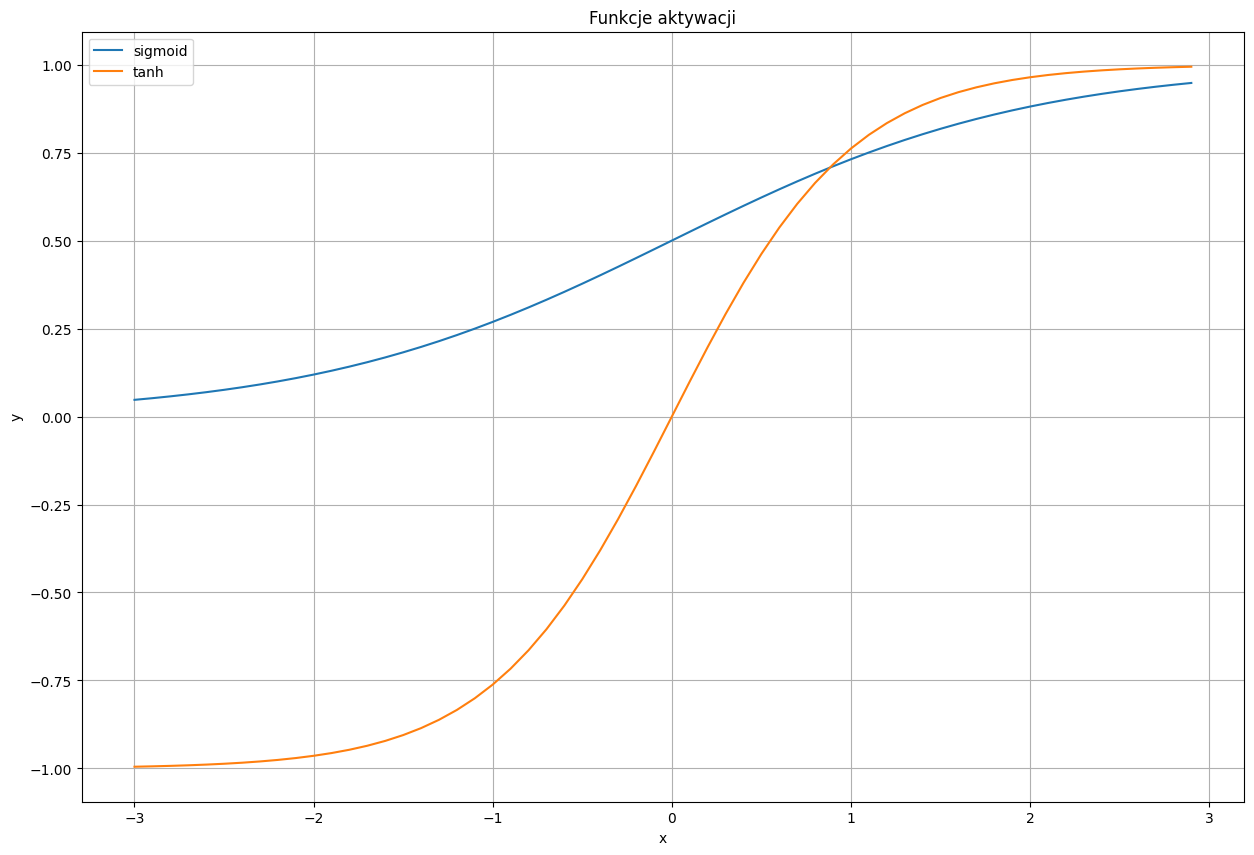

In [13]:
x = tf.range(-3, 3, 0.1, tf.float32)
plt.figure(figsize=(15, 10))
plt.title('Funkcje aktywacji')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, tf.nn.sigmoid(x), label='sigmoid')
plt.plot(x, tf.nn.tanh(x), label='tanh')
plt.grid()
plt.legend()
plt.show()

In [14]:
x = tf.random.normal([5, 10])
y = neuron(x, tf.nn.relu)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[-0.8163597   1.6504574   1.976765   -0.48628384  1.8111439  -0.43018737
   0.99190986  0.5091462   1.4006219  -0.5303027 ]
 [ 0.20735586  0.532539   -2.0183537  -0.33208507  0.22567463 -0.45599303
   1.7884369  -0.9376047   1.0165662   1.6786798 ]
 [ 0.42985976  1.726931   -1.4883845  -0.69776297 -0.96131796  0.920662
  -2.5585537  -0.3448977  -0.13074724  0.83084124]
 [ 1.1009495  -0.64869267  0.8385646  -1.1366658  -0.432946    0.20025618
   0.531135    0.20392041  1.2263248  -0.55544835]
 [ 0.12358975 -0.35201955  0.6132152  -0.60176843  0.7185743  -1.2224889
  -0.39633882 -0.9855078   0.37861243  0.6780962 ]]
y(5, 5): [[1.700532   2.862032   4.489773   2.847149   3.4532504 ]
 [0.8101648  2.2236776  3.7363212  1.4471337  0.        ]
 [0.         0.8310058  0.         1.6071173  0.        ]
 [0.1906755  0.01754904 1.4018959  0.         0.61712444]
 [0.         0.515682   1.22962    0.07657236 0.        ]]


In [15]:
x = tf.random.normal([5, 10])
y = neuron(x, tf.nn.tanh)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[ 0.8977056  -0.55281705 -0.0171643   1.1037612  -1.1034666   0.11681365
   0.26727426  1.3749442  -1.6994033   0.8133446 ]
 [ 0.57648     0.78229684 -1.3932219  -0.60271424  0.37247887 -0.7287673
   0.8647513  -1.267315   -0.9501235   1.0609677 ]
 [-0.2743424   1.3558064  -0.39442986 -1.4039329   1.0104289  -0.8891478
  -0.43738833 -1.0833033   0.22345027  0.12425048]
 [-0.9793484  -0.75285196  1.7198756   0.62155104  1.2771856   0.44728595
  -0.6121339  -0.7073013  -1.2896767  -0.03347332]
 [ 0.12747169 -0.7386203   1.6591341   0.89822954  0.5022291  -0.7872623
   1.8332213  -0.68098044 -0.8667815  -1.2037681 ]]
y(5, 5): [[ 0.9606412   0.41222793 -0.42134747  0.691866    0.98830354]
 [ 0.2919277   0.8405107   0.9057922   0.74597996 -0.89052856]
 [-0.7945795   0.7930176   0.82162756  0.8148452  -0.9222388 ]
 [-0.17998298  0.78080714 -0.6875986   0.01235357  0.68054956]
 [ 0.54103965 -0.2230992   0.6620716  -0.7095565   0.57992744]]


Funkcje aktywacji mogą być również zaimplementowane z wykorzystaniem **Keras API**:

In [16]:
x = tf.random.normal([5, 10])
y = neuron(x, tf.keras.layers.Activation('relu'))

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[-1.9803818   0.39877245 -1.4935621  -0.9149695   0.85481274 -0.10721581
   0.06764392 -0.56755906  0.21366356  0.8704178 ]
 [-0.14750732  1.1703076   0.6372065  -0.4012488  -1.1300418   0.07308294
  -0.01839826 -0.90072316  0.03817759 -0.4442446 ]
 [ 0.21580122 -0.33783692  0.55056053 -0.09051444 -0.18748352  0.4703719
  -1.2106811  -1.8657315  -0.3540745  -0.07229342]
 [ 1.5759164  -1.1429645  -0.6452268  -0.56446546  1.0375868  -0.1123205
  -0.12096976 -0.29645878  0.41134292 -0.40212333]
 [ 0.06778701  0.06249717 -1.4804976  -0.43916586  0.7716361  -1.0152718
  -0.3984393  -1.5109183   0.420758   -0.6521509 ]]
y(5, 5): [[0.         1.5847632  0.         0.92770326 0.        ]
 [0.         0.         0.         0.20274346 0.44661194]
 [0.         0.         0.         0.         0.        ]
 [0.6510931  0.5311435  1.4418321  0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


In [17]:
x = tf.random.normal([5, 10])
y = neuron(x, tf.keras.layers.Activation('tanh'))

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[ 2.6805403   0.29233053 -0.17264496  3.6570482  -0.06525793 -1.4514017
  -1.0991721  -1.7999235   0.19033663 -0.38579133]
 [ 0.84432393 -0.01120892  0.22630408 -0.3110049  -1.8481616   1.1922287
   0.68316156  0.04923407  0.57533586  1.0242969 ]
 [-1.0396311  -0.81788     0.7295728   1.3906581  -0.9736577  -0.15136279
   0.78665584 -1.4362296  -1.0220615  -0.11798513]
 [ 0.8694705  -0.51699597 -0.41705823  0.5577841  -0.9159076   0.1565107
   1.4245615  -1.0793567  -0.83586204 -1.6119041 ]
 [-0.60930127 -0.5203204   0.32794815 -0.03341581 -0.6149668  -0.20413472
   0.94307834  0.7150287  -0.3649008  -0.2840668 ]]
y(5, 5): [[ 0.9947208  -0.2085068   0.9981238  -0.17302267  0.4900714 ]
 [ 0.80046546  0.6426356   0.84325856  0.5541415   0.98021483]
 [-0.87663716 -0.71265674 -0.9533867  -0.9041445  -0.49808577]
 [ 0.08995032 -0.87479365 -0.7454867  -0.9519891  -0.76302654]
 [-0.47628117 -0.12074307 -0.7305883  -0.11975548  0.5480894 ]]


Analogicznie, operacja neuronu jest zaimplementowana w **Keras API**.

**Uwaga:** podczas pierwszego wywołania neuronu w zaalokowane zostaną wewnątrzne zmienne uczące się.

In [18]:
neurons = tf.keras.layers.Dense(5, activation='relu')

In [19]:
x = tf.random.normal([5, 10])
y = neurons(x)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')
print('\n\nZmienne wewnętrzne:\n', neurons.trainable_variables)

x(5, 10): [[-0.2706221   1.4203218  -0.75881654  1.1885319   0.4199261   0.92751294
   0.9296195   0.65161467 -0.2387607  -0.5719697 ]
 [ 0.7370986   1.3871061   0.6373178  -1.2209059   1.1105742   1.4119703
   0.14376348 -1.2831984   0.13969077 -0.43154287]
 [-1.190171    0.23677406  1.736422   -0.9256066  -0.7351454  -0.6074921
   0.5373716   0.13733561 -1.0532467   0.19426133]
 [-0.08268031  2.173471    1.1194636  -1.0142117   0.22878815 -0.8417079
  -1.8773522  -1.2967583   0.5793104  -0.58531284]
 [ 0.08200646 -0.7956759   1.1014816   1.1459706   0.58046037  0.18441206
   0.79440147  0.4919588   0.10300004  0.5837507 ]]
y(5, 5): [[0.         0.         0.         0.5386479  0.        ]
 [0.         0.         0.24756607 0.93892217 0.        ]
 [0.         0.9923049  0.28975403 0.6757584  0.7140506 ]
 [0.         1.2606995  0.1473102  1.3744942  0.        ]
 [1.3008914  0.9256792  0.         0.8309048  1.1442821 ]]


Zmienne wewnętrzne:
 [<Variable path=dense/kernel, shape=(10, 5),

Operując biblioteką TensorFlow w kontekście Widzenia Komputerowego, można zauważyć, że posiada ona wiele operacji poznanych wcześniej w ramach klasycznego przetwarzania obrazów. Są to m.in. konwolucja oraz pooling.

**Uwaga:** formalnie, konwolucja jest operacją ''przemnożenia'' **odwróconym** filtrem danych wejściowych. ''Przemnożenie'' **nieodwróconym** filtrem nazywa się operacją **koralacji**. Ze względu na fakt, że w przetwarzaniu neuronowym filtrem są zmienne uczące się, nie ma znaczenia czy odwrócimy czy nie filtr. Dlatego w celach optymalizacyjnych implementacja konwolucji w TensorFlow jest formalnie operacją korelacji.

Poniżej zaprezentowana została implementacja konwolucji w kontekście laboratoriów dotyczących operacji splotowych.

Dla podanych tablic **f** i **g** wykonaj operację konwolucji. Zastosuj uzupełnienie zerami, przesunięcie jednostkowe oraz rozszerzenie równe 1.

$f = [1, 2, 3]$  
$g = [1, 0, 1]$

**1. Uzupełnienie:**

$f = [0, 1, 2, 3, 0]$

**2. Wykonanie konwolucji:**

Konwolucja zostanie wykonana dla $t \in <0, 1, 2>$

$(f \ast g)(0) = 0 * 1 + 1 * 0 + 2 * 1 = 2$  
$(f \ast g)(1) = 1 * 1 + 2 * 0 + 3 * 1 = 4$  
$(f \ast g)(2) = 2 * 1 + 3 * 0 + 0 * 1 = 2$  

$f \ast g = [2, 4, 2]$

In [20]:
a = tf.constant([1, 2, 3])[tf.newaxis, :, tf.newaxis]
f = tf.constant([1, 0, 1])[:, tf.newaxis, tf.newaxis]

y = tf.nn.conv1d(a, f, 1, 'SAME')

print(f'a: {a[0, :, 0]}')
print(f'f: {f[:, 0, 0]}')
print(f'y: {y[0, :, 0]}')

a: [1 2 3]
f: [1 0 1]
y: [2 4 2]


TensorFlow zawiera gotową implementację warstwy konwolucyjnej zawierającą również zarządzanie zmiennymi uczącymi. Domyślną konfiguracją biblioteki TensorFlow jest wspieranie **wielu operacji na raz**, np. zamiast wykonując konwolucję jednego filtru, może być ich wykonanych N.

Dla poniższego przykładu danymi wejściowymi jest tensor 4 wymiarowy **(pierwszy wymiar zazwyczaj traktowany jest jako liczna równoległych przykładów przetwarzanych na raz)**, który może oznaczać np. 3 obrazy o rozmiarze 128x128, 3 kanałach (float).

Pojedynczą operacją konwolucji byłoby stworzenie filtru np. 5x5 który obsługuje dane wejściowe 3-wymiarowe. Czyli pojedynczy filtr miałby rozmiar \[5, 5, 3\]. Efektem wykonania konwolucji na obrazach wejściowych byłby **batch** obrazów o rozmiarze \[3, 128, 128, 1\] (ponieważ każdy filtr produkuje jedną wartość.

Jeśli wykonamy N takich niezależnych filtrów, otrzymamy tensor \[3, 128, 128, N\].

In [21]:
N = 10
kernel_size = (5, 5)

conv1 = tf.keras.layers.Conv2D(N, kernel_size, 1, 'same')

In [22]:
images = tf.ones([1, 128, 128, 3], tf.float32)
images_filtered = conv1(images)

print(f'Rozmiar obrazów wejściowych: {images.shape}')
print(f'Rozmiar przefiltrowanych obrazów: {images_filtered.shape}')

Rozmiar obrazów wejściowych: (1, 128, 128, 3)
Rozmiar przefiltrowanych obrazów: (1, 128, 128, 10)


**W ten sposób, każdy z pikseli opisaliśmy N cechami.**

Podobnymi operacjami są operacjie **poolingu**, czyli operacji które nie zawierają zmiennych uczących się, np. wybranie największej/najmniejszej/średniej/mediany wartości z danego okna.

In [23]:
f_max = tf.keras.layers.MaxPooling2D((2, 2), 2, 'same')
f_ave = tf.keras.layers.AveragePooling2D((2, 2), 2, 'same')

images_max = f_max(images_filtered)
images_ave = f_ave(images_filtered)

print(f'Rozmiar obrazów po max poolingu: {images_max.shape}')
print(f'Rozmiar obrazów po average poolingu: {images_ave.shape}')

Rozmiar obrazów po max poolingu: (1, 64, 64, 10)
Rozmiar obrazów po average poolingu: (1, 64, 64, 10)


W powyższym przykładzie zostosowane zostało przesunięcie z krokiem równym 2 (stąd rozmiar wynikowy jest 2-krotnie mniejszy).

Ostatnim przykładem podstawowej operacji w TensorFlow jest funkcja wykonująca sekwencję operacji przekazując między sobą wyniki.

W ten sposób, można znacznie uprościć swój model przetwarzania, pod warunkiem, że wszelkie warstwy i pod-modele zaimplementowane będą w Keras API.

In [24]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(8, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(16, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(32, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

In [25]:
images = tf.ones([1, 128, 128, 3], tf.float32)
y = model(images)

print(f'Rozmiar danych wejściowych: {images.shape}')
print(f'Rozmiar danych wyjściowych: {y.shape}')

Rozmiar danych wejściowych: (1, 128, 128, 3)
Rozmiar danych wyjściowych: (1, 10)


**W powyższym przykładzie każdy obraz opisaliśmy jako 10 wartości.**

## Proces uczenia

### Przygotowanie danych wejściowych

Jako dane wejściowe pobieramy obrazy pochodzące ze zbioru MNIST. Jeśli to możliwe najlepszym rozwiązaniem jest wykorzystanie **TensorFlow Dataset API** do wczytania i preprocessingu danych.

Poniższy przykład wczytuje najpierw dane do postaci tablic NumPy, następnie transformuje je do postaci potoku danych (**tf.data.Dataset.from_tensor_slices**), który jest modyfikowany według architektury strumieniowej:
- mieszanie danych (tak aby kolejność danych była losowa),
- grupowanie (aby przyspieszyć przetwarzanie danych),
- wstępne pobieranie (aby w czasie bezczynności potoku mógł wcześniej pobrać dane o które dopiero będziemy pytać w przyszłości)

In [26]:
def preprocess(image, label):
  return tf.cast(image, tf.float32)[..., tf.newaxis], label

def mnist(batch_size=16):
    train_ds, val_ds = tf.keras.datasets.mnist.load_data()

    train_ds = tf.data.Dataset.from_tensor_slices(train_ds) \
        .map(preprocess, num_parallel_calls=8) \
        .shuffle(1024) \
        .batch(batch_size) \
        .prefetch(8)

    val_ds = tf.data.Dataset.from_tensor_slices(val_ds) \
    .map(preprocess, num_parallel_calls=8) \
        .shuffle(1024) \
        .batch(batch_size) \
        .prefetch(8)

    return train_ds, val_ds

Dane składają się z listy par: obraz, klasa przyporządkowana do obrazu.

In [27]:
train_ds, val_ds = mnist(128)

first_train_batch = next(iter(train_ds))
images, labels = first_train_batch

print(images.shape, labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(128, 28, 28, 1) (128,)


In [28]:
imshow(images.numpy()[0])
imshow(images.numpy()[1])
imshow(images.numpy()[2])
imshow(images.numpy()[3])

### Przygotowanie modelu przetwarzanie

In [29]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(8, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(16, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(32, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

In [30]:
y = model(images)

print(f'Rozmiar danych wejściowych: {images.shape}')
print(f'Rozmiar danych wyjściowych: {y.shape}')

Rozmiar danych wejściowych: (128, 28, 28, 1)
Rozmiar danych wyjściowych: (128, 10)


### (Uproszczona) definicja sposobu uczenia

In [31]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(True), metrics=['accuracy'])

### Wywołanie pętli uczenia modelu

In [32]:
model.fit(train_ds, epochs=3)
model.evaluate(val_ds)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7202 - loss: 1.6937
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9489 - loss: 0.1661
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9692 - loss: 0.1053
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9630 - loss: 0.1205


[0.09769190847873688, 0.9697999954223633]

In [33]:
images, labels = next(iter(val_ds))

predictions = model.predict(images)

print(labels)
print(tf.argmax(predictions, -1))

imshow(images.numpy()[0])
imshow(images.numpy()[1])
imshow(images.numpy()[2])
imshow(images.numpy()[3])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
tf.Tensor(
[0 6 1 2 5 4 4 2 3 4 6 9 0 6 4 3 1 3 0 6 6 7 1 2 1 9 7 8 6 3 4 2 1 5 0 2 0
 7 0 2 6 4 4 9 7 7 9 4 1 9 8 9 1 2 3 6 5 2 9 1 1 1 2 1 0 6 1 7 8 0 6 9 8 8
 7 4 1 1 9 2 9 6 9 8 2 9 8 3 6 4 4 6 5 3 2 2 9 7 7 2 2 8 0 8 1 1 5 5 4 4 8
 0 4 1 2 6 3 8 1 1 1 3 5 0 7 4 7 8], shape=(128,), dtype=uint8)
tf.Tensor(
[0 6 1 2 5 4 4 2 3 4 6 9 0 6 4 3 1 3 0 6 6 7 1 2 1 9 7 8 6 3 4 1 1 5 7 2 0
 7 0 2 6 4 4 9 7 7 9 4 1 9 8 9 1 2 3 6 5 2 4 1 1 1 2 1 0 6 1 7 8 0 6 9 8 8
 7 4 1 1 9 2 9 6 9 8 2 9 8 3 6 4 4 6 5 3 2 2 9 7 7 2 2 8 0 8 1 1 5 5 4 4 8
 0 4 1 8 6 3 8 1 1 1 3 5 0 7 4 7 8], shape=(128,), dtype=int64)
